In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data=pd.read_csv('shampoo_sales.csv')

data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


Text(0, 0.5, 'Sales')

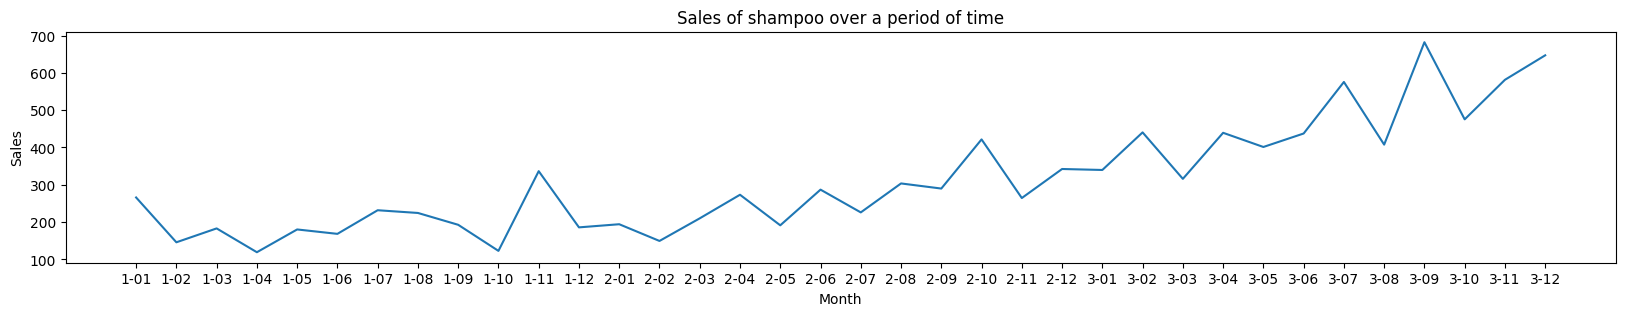

In [10]:
plt.figure(figsize=(20,3))
plt.plot(data['Month'],data['Sales'])
plt.title('Sales of shampoo over a period of time')
plt.xlabel('Month')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

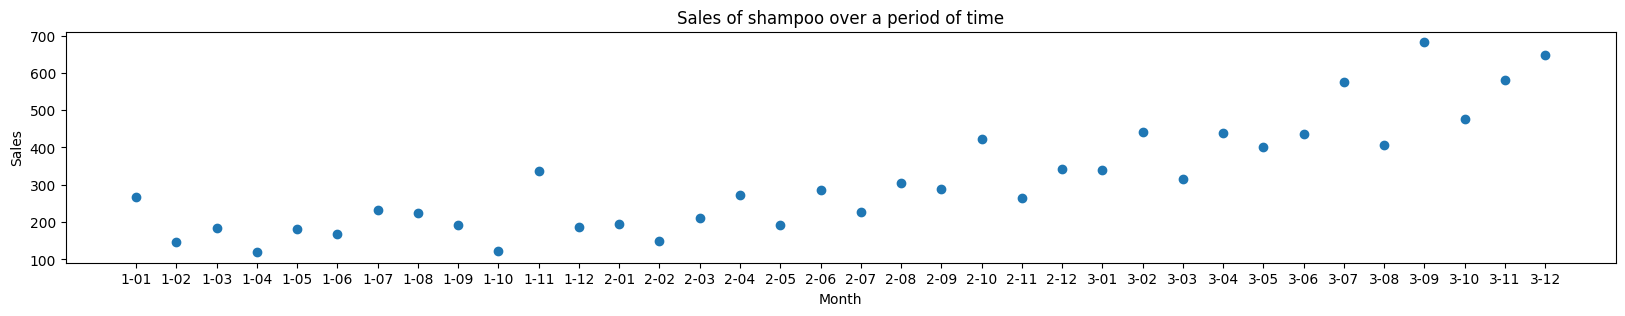

In [11]:
plt.figure(figsize=(20,3))
plt.scatter(data['Month'],data['Sales'])
plt.title('Sales of shampoo over a period of time')
plt.xlabel('Month')
plt.ylabel('Sales')

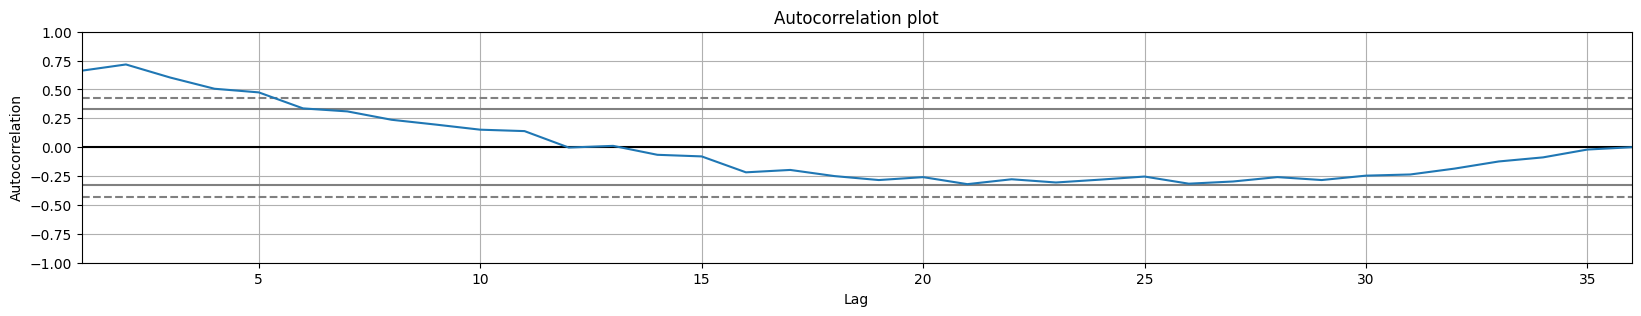

In [12]:
plt.figure(figsize=(20,3))
pd.plotting.autocorrelation_plot(data['Sales'])
plt.title('Autocorrelation plot')
plt.show()

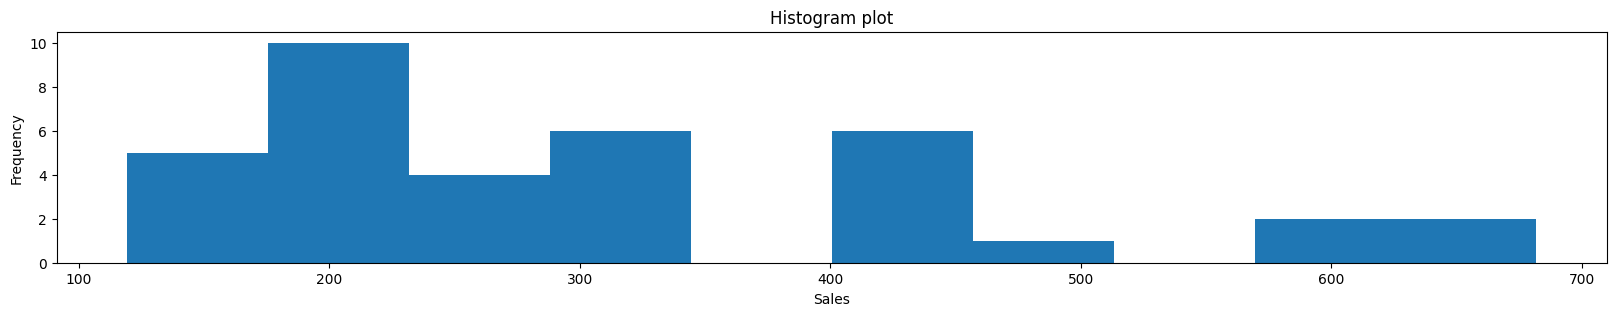

In [16]:
plt.figure(figsize=(20,3))
plt.hist(data['Sales'],bins=10)
plt.title('Histogram plot')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

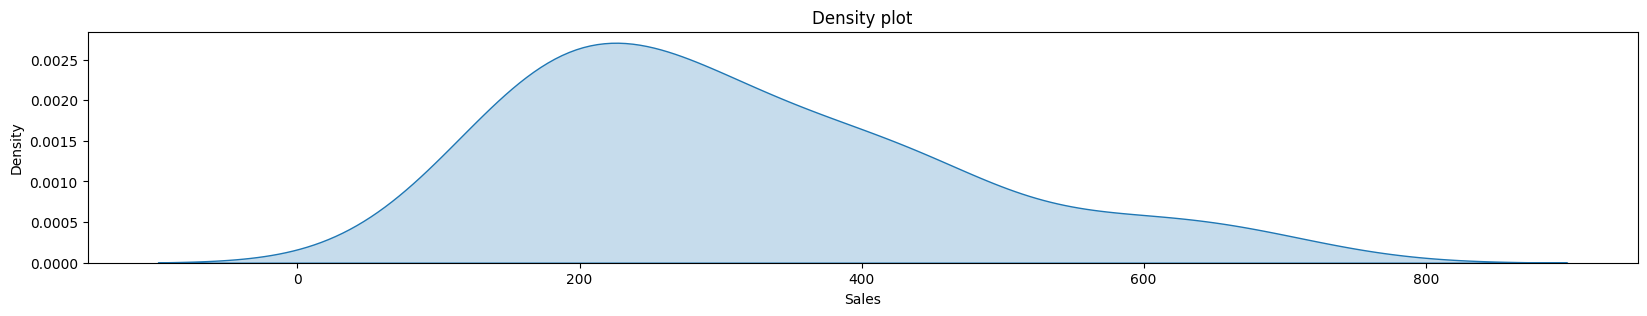

In [18]:
plt.figure(figsize=(20,3))
sns.kdeplot(data['Sales'],fill=True)
plt.title('Density plot')
plt.xlabel('Sales')
plt.show()

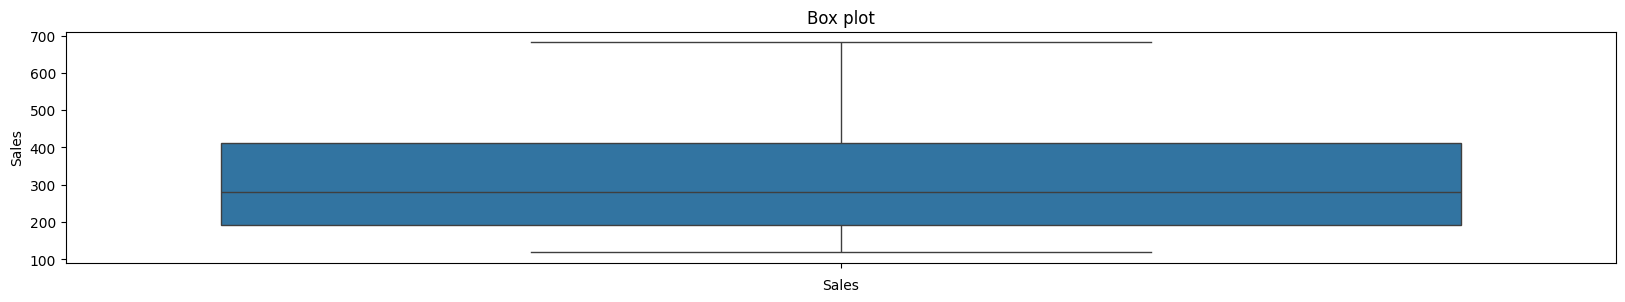

In [19]:
plt.figure(figsize=(20,3))
sns.boxplot(data['Sales'])
plt.title('Box plot')
plt.xlabel('Sales')
plt.show()

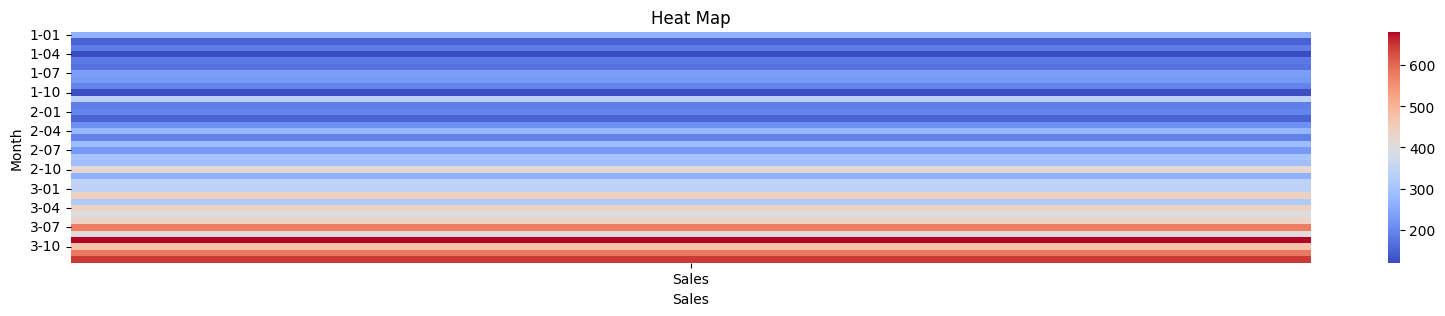

In [32]:
plt.figure(figsize=(20,3))
sns.heatmap(data,cmap='coolwarm')
plt.title('Heat Map')
plt.xlabel('Sales')
plt.show()

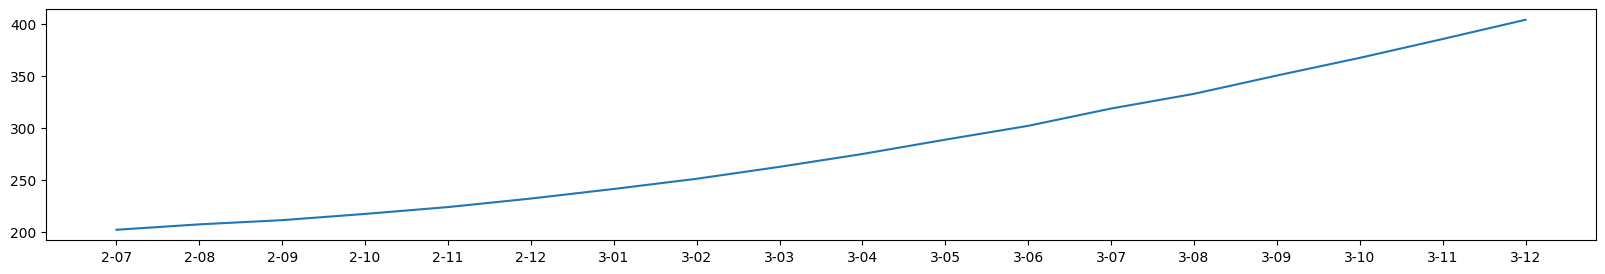

In [38]:
data['Sales_mv_avg']=data['Sales'].rolling(10).mean()
plt.figure(figsize=(20,3))
plt.plot(data['Month'],data['Sales_mv_avg'])

In [40]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA_model=ARIMA(endog=data['Sales'],order=(1,1,1))
ARIMA_model_fit=ARIMA_model.fit()
ARIMA_model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -105.469
Date:                Thu, 30 Jan 2025   AIC                            216.939
Time:                        06:30:48   BIC                            221.605
Sample:                             0   HQIC                           218.550
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9881      0.068     14.565      0.000       0.855       1.121
ma.L1         -0.7832      0.315     -2.487      0.013      -1.401      -0.166
sigma2       100.0767     31.294      3.198      0.001      38.741     161.412
===================================================================================
Ljung-Box (L1) (Q):                  16.81   Jarque-Bera (JB):                12.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              51.77   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""